# CONCRETE STRENGTH PREDICTION - PRACTICE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.columns = ['Cement', 'Blast_furnace_slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']

df.head()

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_furnace_slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.isnull().sum()

Cement                0
Blast_furnace_slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
print(f"No. of duplictae values = {df.duplicated().sum()}")

No. of duplictae values = 25


In [9]:
corr = df.corr()
df.corr()

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

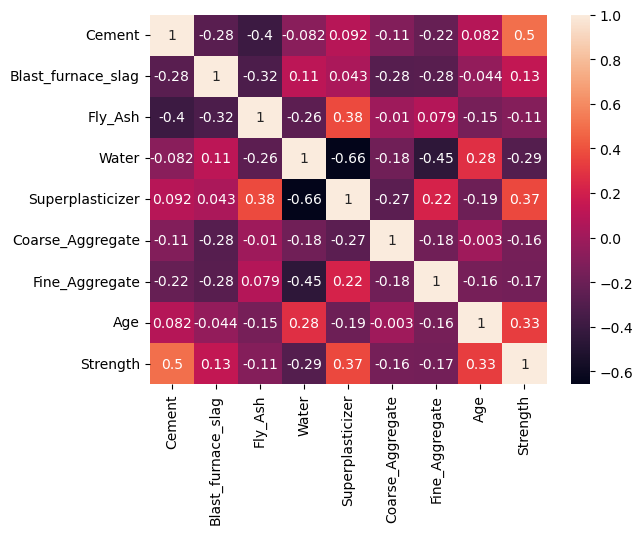

In [10]:
sns.heatmap(corr, annot=True)

Heatmap shows that
- strength is directly proportional to with Cement, Superplasticizer and age

In [11]:
df.describe()

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Splitting into inpur variables and Target variables

In [12]:
X = df.drop(columns=["Strength"])
Y = df["Strength"]


In [13]:
X

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [14]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

Now We will mmake the test train split 
- we will perform the EDA only on the training data set i.e. X_train & Y_train
- hence we will try to keep our test dataset seperate


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and testing sets
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

Now we will try to get the distribution plots for all the feature at once by using the for loop

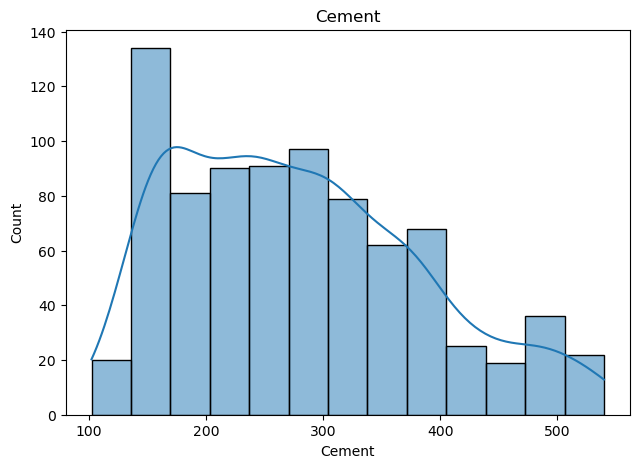

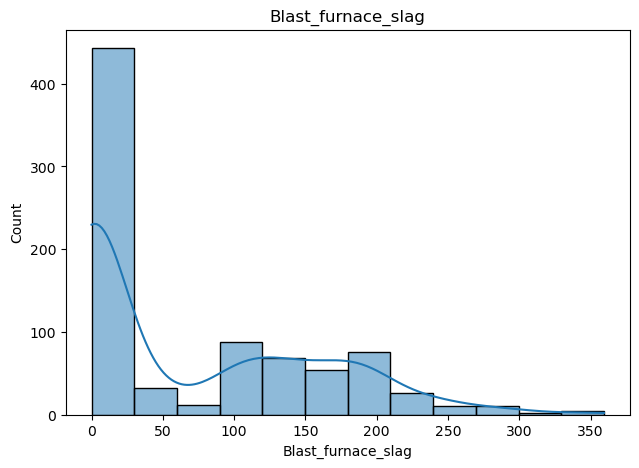

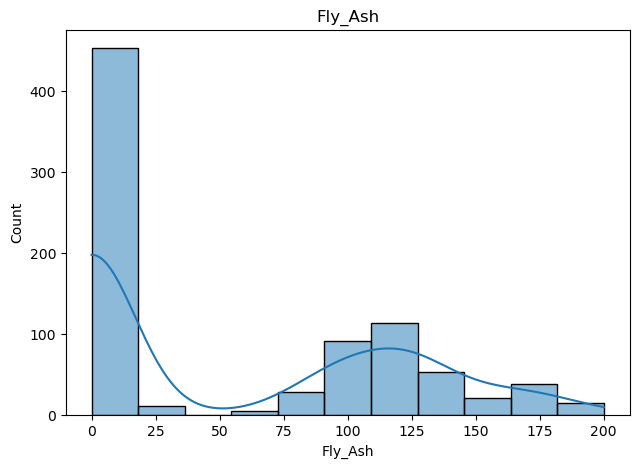

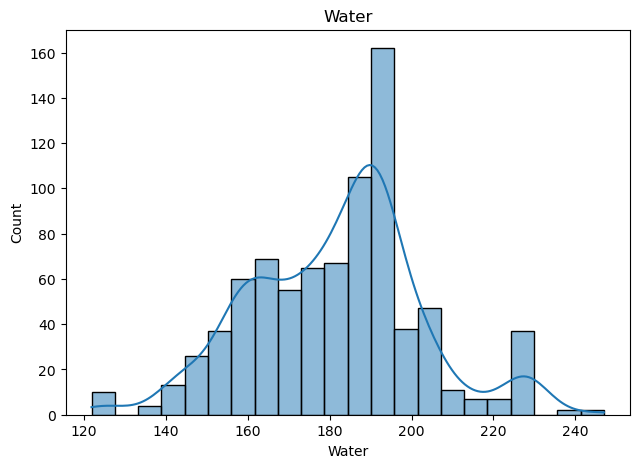

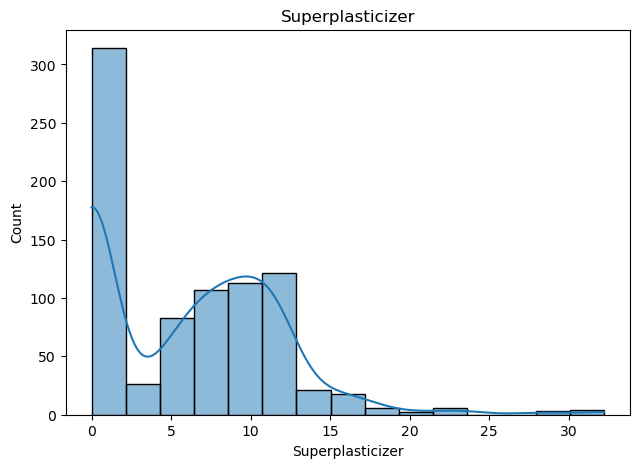

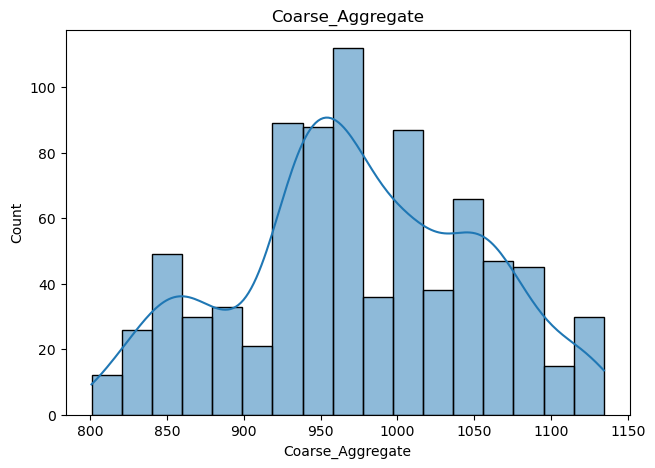

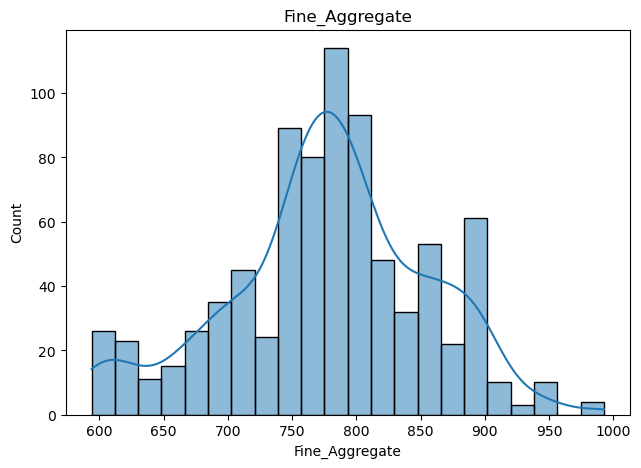

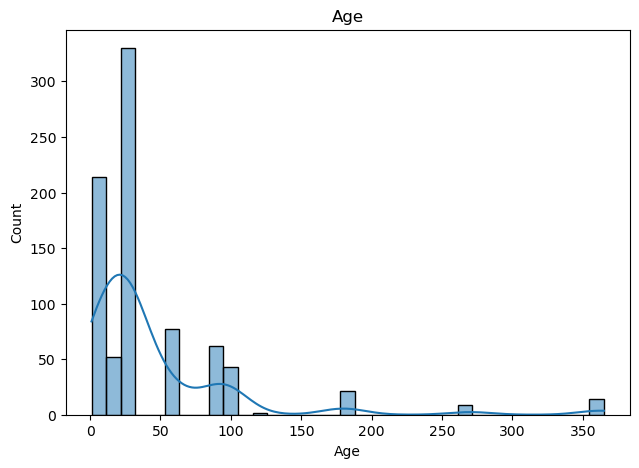

In [17]:
for col in X_train.columns:
    plt.figure(figsize=(16,5))  #should be at start otherwise it wont be applied to 1st plot
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)



#The first digit (1) specifies the number of rows in the subplot grid.
#The second digit (2) specifies the number of columns in the subplot grid.
#The third digit (1) specifies the index of the current subplot within the grid.
#121 means that you're creating a 1x2 grid of subplots, and you're working with the first subplot.

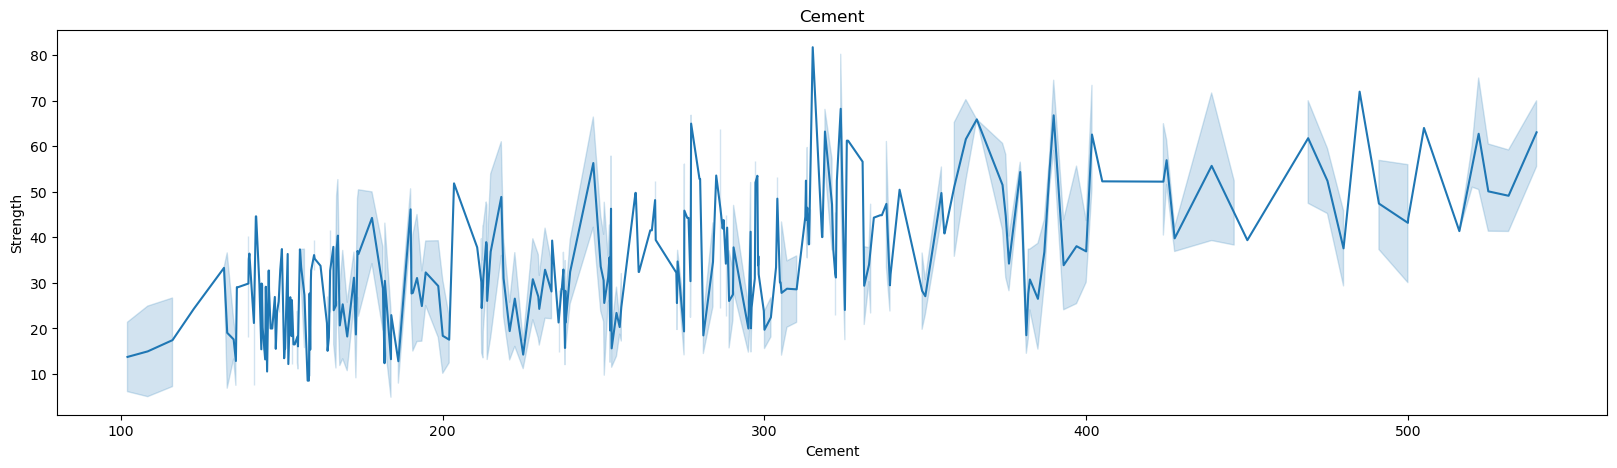

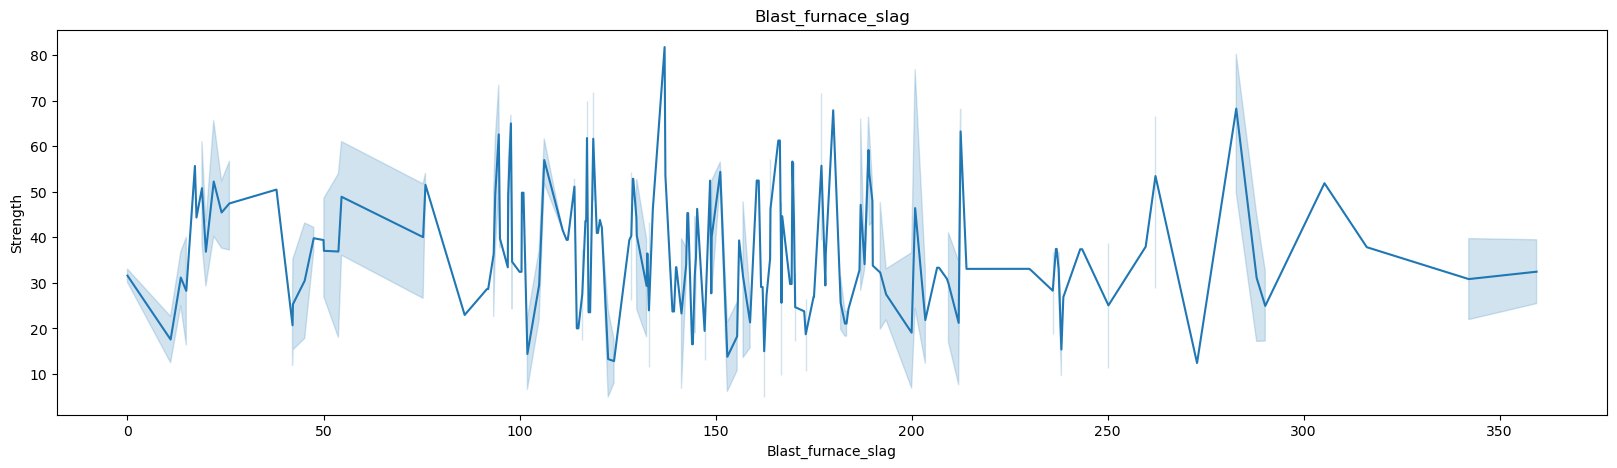

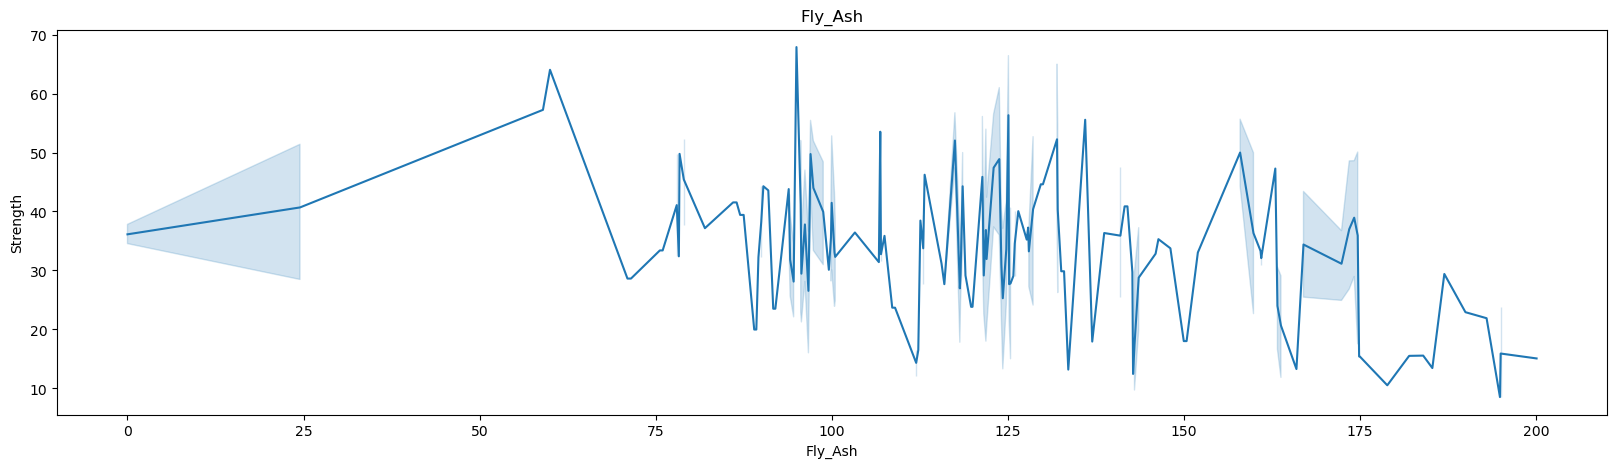

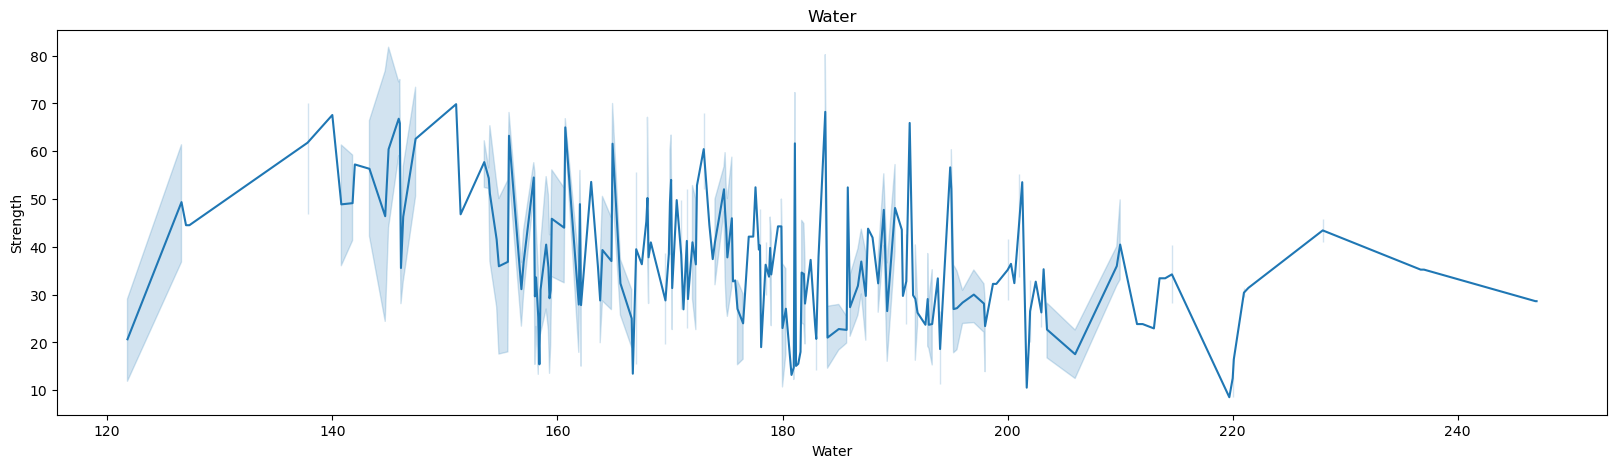

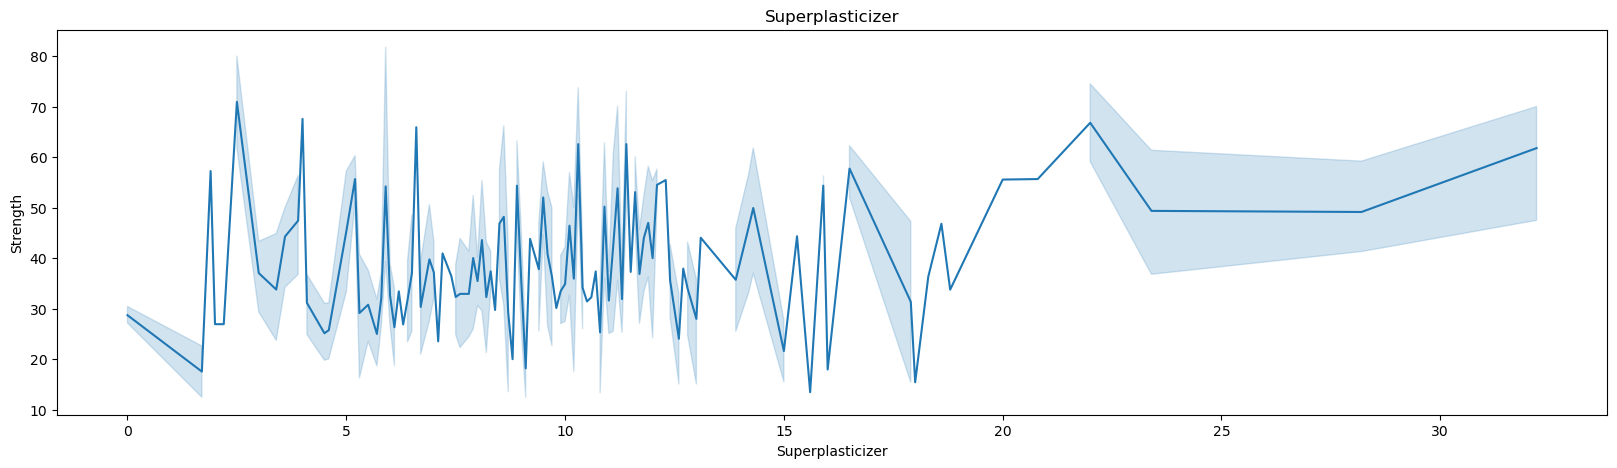

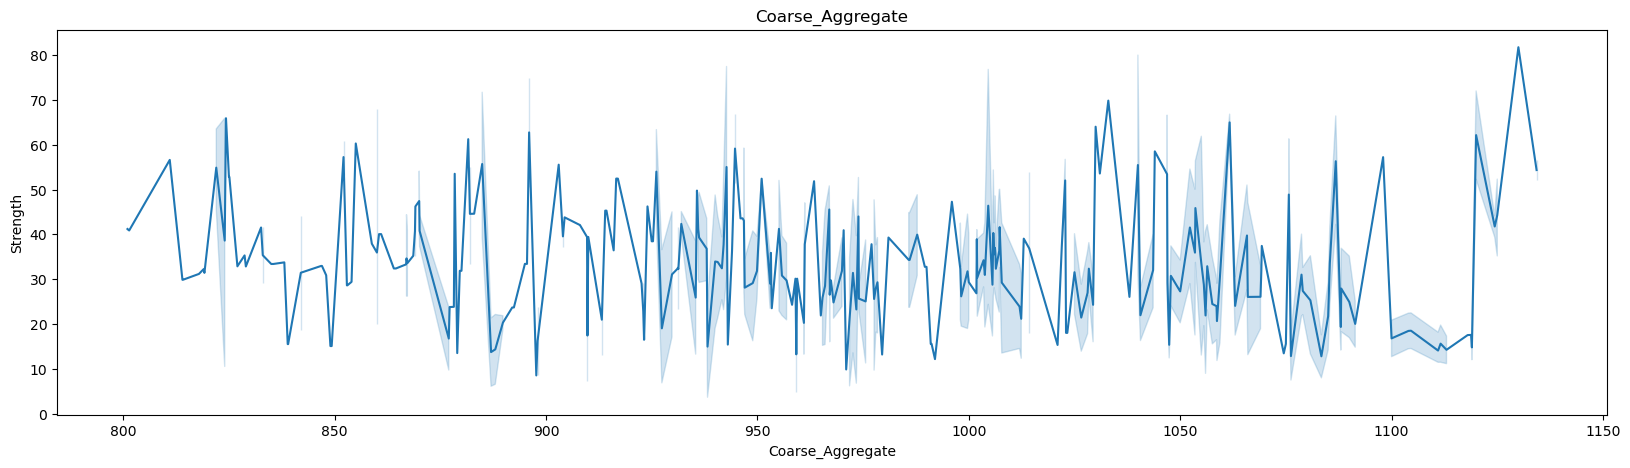

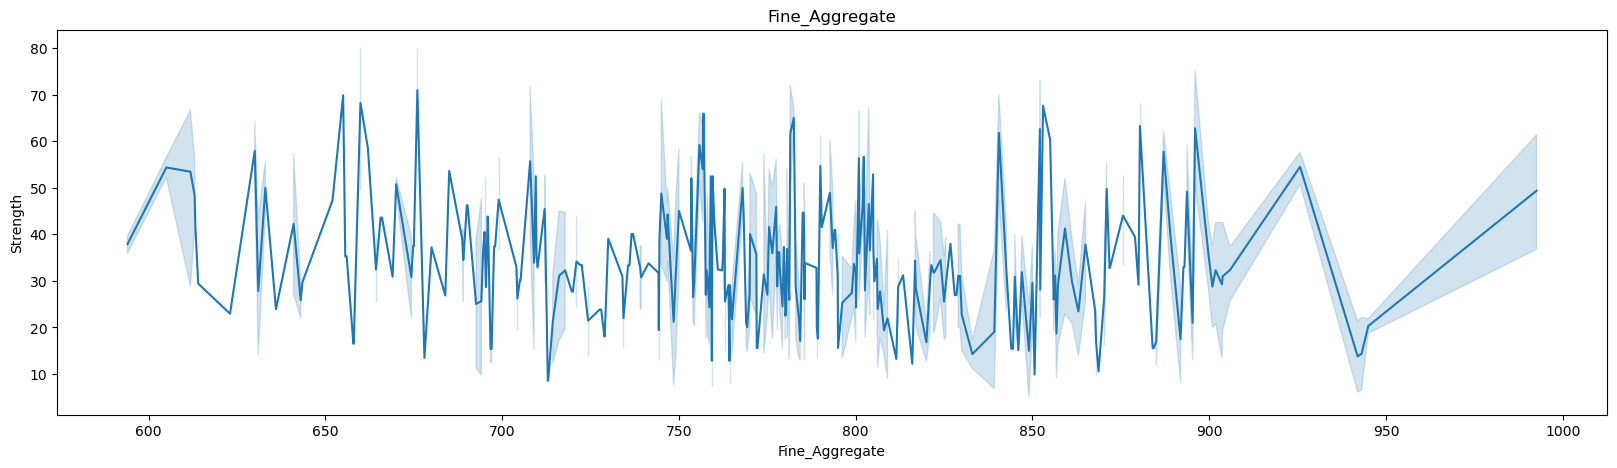

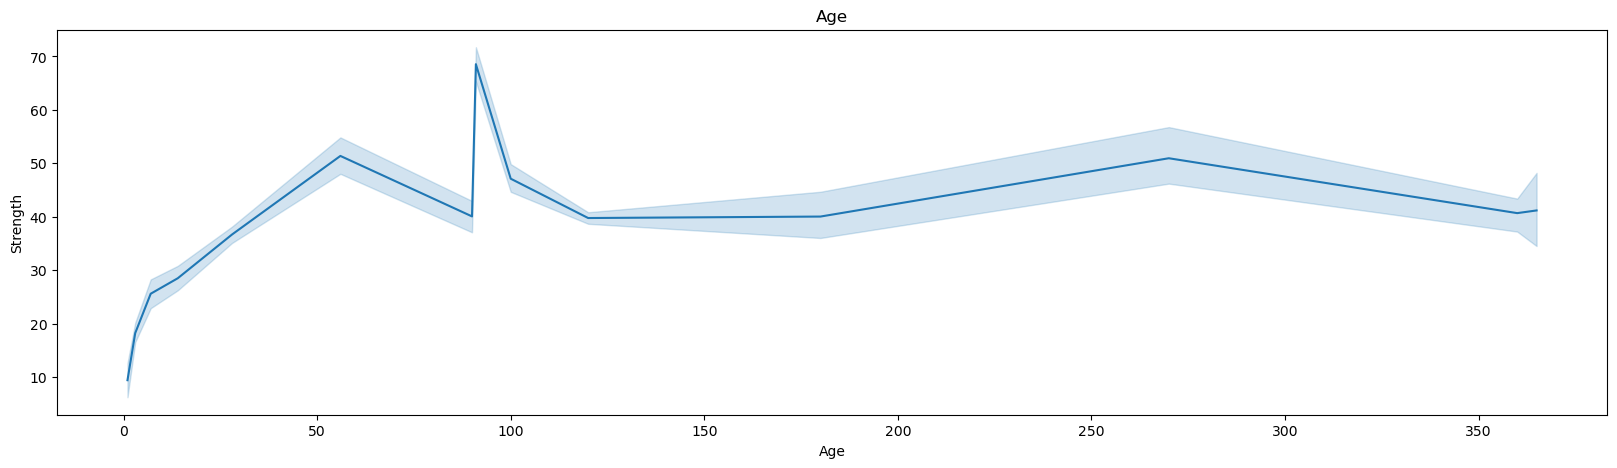

In [18]:
for col in X_train.columns:
    plt.figure(figsize=(20,5))  #should be at start otherwise it wont be applied to 1st plot
    #plt.subplot(121)
    sns.lineplot(x =X_train[col], y= Y_train)
    plt.title(col)

# Taining Models

In [19]:
!pip install xgboost


In [20]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

#importing models from Scikit-learn library

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor



Linear Regression

In [22]:
model = LinearRegression()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for Linear_Regression model = ',r2_score(Y_test, Y_pred)) 
print('MAE for Linear_Regression model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for Linear_Regression model =  0.5210125654324628
MAE for Linear_Regression model =  8.822163447997292


Lasso

In [23]:
model = Lasso()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for Lasso model = ',r2_score(Y_test, Y_pred)) 
print('MAE for Lasso model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for Lasso model =  0.5238401526193532
MAE for Lasso model =  8.812495160938912


Ridge Regression

In [24]:
model = Ridge()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for Ridge Regression model = ',r2_score(Y_test, Y_pred)) 
print('MAE for Ridge Regression model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for Ridge Regression model =  0.5210138989687512
MAE for Ridge Regression model =  8.82215864370449


SVR

In [25]:
model = SVR(kernel='linear')

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for SVR model = ',r2_score(Y_test, Y_pred)) 
print('MAE for SVR model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for SVR model =  0.3940037188749359
MAE for SVR model =  9.05072843906116


KNN

In [26]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for KNN model = ',r2_score(Y_test, Y_pred)) 
print('MAE for KNN model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for KNN model =  0.641125334341986
MAE for KNN model =  7.022893203883496


XG BOOST

In [48]:
model = XGBRegressor(n_estimators=50,learning_rate=0.16,max_depth=5)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for XGBoost model = ',r2_score(Y_test, Y_pred)) 
print('MAE for XGBoost model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for XGBoost model =  0.9030601177913624
MAE for XGBoost model =  3.4959848332636563


Decision Tree

In [52]:
model = DecisionTreeRegressor(max_depth=8)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print('R2 score for Decision Tree model = ',r2_score(Y_test, Y_pred)) 
print('MAE for Decision Tree model = ',mean_absolute_error(Y_test, Y_pred))

R2 score for Decision Tree model =  0.8172308860271129
MAE for Decision Tree model =  4.8791602858108805


PREDICTION MODEL 

We will choose XG boost as it gave us the highest R2 score

In [56]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
r2_score(Y_test,Y_pred)

0.9091070010820105

In [ ]:
# we will define a function to apply the model to input data 

def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    
    return prediction[0]

In [58]:
X_train

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
612,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28
525,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
597,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28
846,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28
259,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3
...,...,...,...,...,...,...,...,...
960,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28
847,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28
715,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90
905,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28


In [59]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

Checking Prediction

In [70]:
# Get inputs from  for the variables

cem = float(input("Enter cement content (cem): "))
blastf = float(input("Enter blast furnace slag content (blastf): "))
flyas = float(input("Enter fly ash content (flyas): "))
water = float(input("Enter water content (water): "))
superplaster = float(input("Enter superplasticizer content (superplaster): "))
courseagg = float(input("Enter coarse aggregate content (courseagg): "))
fineagg = float(input("Enter fine aggregate content (fineagg): "))
age = int(input("Enter the age (in days): "))

#applying the model to input features
prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)

print(f'For: \n cement content= {cem}',
      f'\n blast furnace slag content= {blastf}',
      f'\n fly ash content= {flyas}',
      f'\n water={water}',
      f'\n superplasticizer content= {superplaster}',
      f'\n coarse aggregate content= {courseagg}',
      f'\n fine aggregate content= {fineagg}',
      f'\n the age (in days)= {age}')

print("strength is : ",prediction)

For: 
 cement content= 156.0 
 blast furnace slag content= 156.0 
 fly ash content= 154.0 
 water=178.0 
 superplasticizer content= 16.0 
 coarse aggregate content= 999.0 
 fine aggregate content= 888.0 
 the age (in days)= 28
strength is :  [29.793116]


In [71]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))